In [1]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from math import factorial

In [2]:
filterComponentDir = '../components/camera/filters'
intermediateDir = '../intermediateFiles/components/camera/'
uBandFile = os.path.join(filterComponentDir, 'u_band_Response.dat')
gBandFile = os.path.join(filterComponentDir, 'g_band_Response.dat')
rBandFile = os.path.join(filterComponentDir, 'r_band_Response.dat')
iBandFile = os.path.join(filterComponentDir, 'i_band_Response.dat')
zBandFile = os.path.join(filterComponentDir, 'z_band_Response.dat')
yBandFile = os.path.join(filterComponentDir, 'y_band_Response.dat')
s1ContaminationFile = os.path.join(filterComponentDir, 'filter_Losses/filter_S1_Contamination.dat')
s2ContaminationFile = os.path.join(filterComponentDir, 'filter_Losses/filter_S2_Contamination.dat')
s1CondensationFile = os.path.join(filterComponentDir, 'filter_Losses/filter_S1_Condensation.dat')
s2CondensationFile = os.path.join(filterComponentDir, 'filter_Losses/filter_S2_Condensation.dat')
uBandThroughputFile = os.path.join(intermediateDir, 'uBandThroughput.dat')
gBandThroughputFile = os.path.join(intermediateDir, 'gBandThroughput.dat')
rBandThroughputFile = os.path.join(intermediateDir, 'rBandThroughput.dat')
iBandThroughputFile = os.path.join(intermediateDir, 'iBandThroughput.dat')
zBandThroughputFile = os.path.join(intermediateDir, 'zBandThroughput.dat')
yBandThroughputFile = os.path.join(intermediateDir, 'yBandThroughput.dat')

In [3]:
uBandResponse = np.loadtxt(uBandFile)
gBandResponse = np.loadtxt(gBandFile)
rBandResponse = np.loadtxt(rBandFile)
iBandResponse = np.loadtxt(iBandFile)
zBandResponse = np.loadtxt(zBandFile)
yBandResponse = np.loadtxt(yBandFile)
s1Contamination = np.loadtxt(s1ContaminationFile)
s2Contamination = np.loadtxt(s2ContaminationFile)
s1Condensation = np.loadtxt(s1CondensationFile)
s2Condensation = np.loadtxt(s2CondensationFile)

In [4]:
wavelen = np.arange(300, 1101, 1)
uBand = np.interp(wavelen, uBandResponse[:,0], uBandResponse[:,1])
gBand = np.interp(wavelen, gBandResponse[:,0], gBandResponse[:,1])
rBand = np.interp(wavelen, rBandResponse[:,0], rBandResponse[:,1])
iBand = np.interp(wavelen, iBandResponse[:,0], iBandResponse[:,1])
zBand = np.interp(wavelen, zBandResponse[:,0], zBandResponse[:,1])
yBand = np.interp(wavelen, yBandResponse[:,0], yBandResponse[:,1])

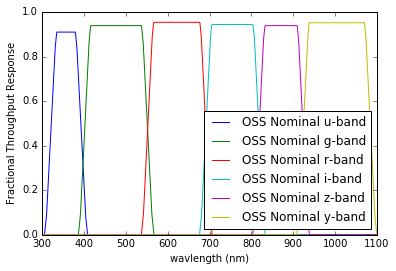

In [5]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(wavelen, uBand, label='OSS Nominal u-band')
_ = plt.plot(wavelen, gBand, label='OSS Nominal g-band')
_ = plt.plot(wavelen, rBand, label='OSS Nominal r-band')
_ = plt.plot(wavelen, iBand, label='OSS Nominal i-band')
_ = plt.plot(wavelen, zBand, label='OSS Nominal z-band')
_ = plt.plot(wavelen, yBand, label='OSS Nominal y-band')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [6]:
wavelen = np.arange(300, 1101, 1)
extrapolator = UnivariateSpline(s1Contamination[:,0], s1Contamination[:,1], k=1)
s1Cont = extrapolator(wavelen)
extrapolator = UnivariateSpline(s2Contamination[:,0], s2Contamination[:,1], k=1)
s2Cont = extrapolator(wavelen)
extrapolator = UnivariateSpline(s1Condensation[:,0], s1Condensation[:,1], k=1)
s1Cond = extrapolator(wavelen)
extrapolator = UnivariateSpline(s2Condensation[:,0], s2Condensation[:,1], k=1)
s2Cond = extrapolator(wavelen)

losses = s1Cont * s2Cont * s1Cond * s2Cond

In [7]:
uBandThru = uBand * losses
gBandThru = gBand * losses
rBandThru = rBand * losses
iBandThru = iBand * losses
zBandThru = zBand * losses
yBandThru = yBand * losses

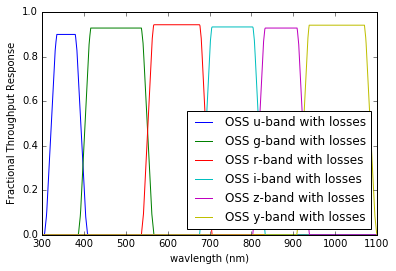

In [8]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(wavelen, uBandThru, label='OSS u-band with losses')
_ = plt.plot(wavelen, gBandThru, label='OSS g-band with losses')
_ = plt.plot(wavelen, rBandThru, label='OSS r-band with losses')
_ = plt.plot(wavelen, iBandThru, label='OSS i-band with losses')
_ = plt.plot(wavelen, zBandThru, label='OSS z-band with losses')
_ = plt.plot(wavelen, yBandThru, label='OSS y-band with losses')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [9]:
np.savetxt(uBandThroughputFile, zip(wavelen, uBandThru), fmt='%.1f %.4f')
np.savetxt(gBandThroughputFile, zip(wavelen, gBandThru), fmt='%.1f %.4f')
np.savetxt(rBandThroughputFile, zip(wavelen, rBandThru), fmt='%.1f %.4f')
np.savetxt(iBandThroughputFile, zip(wavelen, iBandThru), fmt='%.1f %.4f')
np.savetxt(zBandThroughputFile, zip(wavelen, zBandThru), fmt='%.1f %.4f')
np.savetxt(yBandThroughputFile, zip(wavelen, yBandThru), fmt='%.1f %.4f')